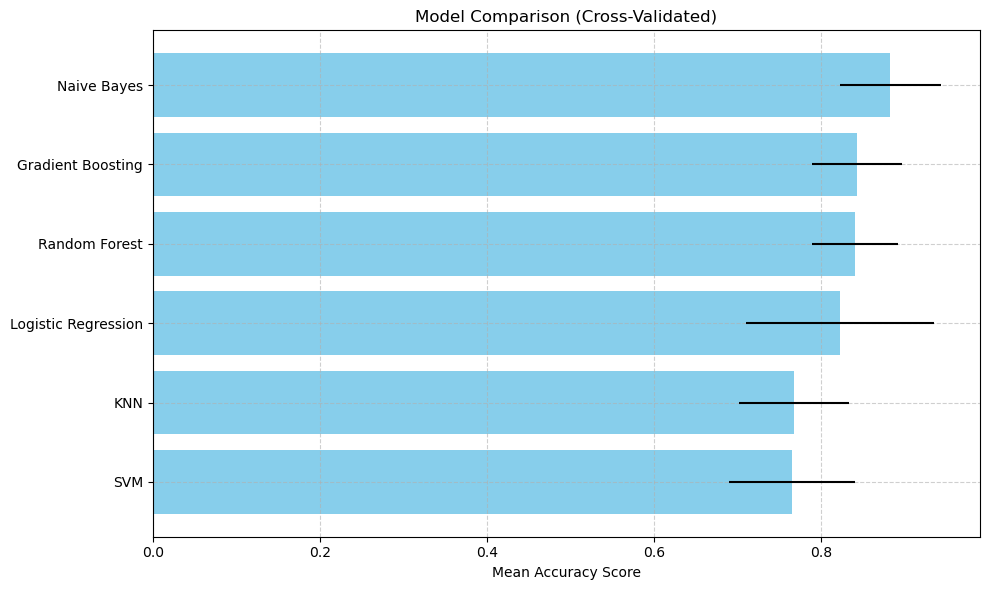

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Load dataset
df = pd.read_csv('Social_Network_Ads.csv')  # 🔁 Replace with your CSV path
df = df.drop(columns=['User ID'])
X = pd.get_dummies(df.drop(columns=['Purchased']), drop_first=True)
y = df['Purchased']

# Define model comparison function
def compare_classifiers(X, y, cv=5, scoring='accuracy'):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = []
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        results.append({
            'Model': name,
            'Mean Score': scores.mean(),
            'Std Dev': scores.std()
        })

    return pd.DataFrame(results).sort_values(by='Mean Score', ascending=False).reset_index(drop=True)

# Run model comparison
comparison_df = compare_classifiers(X, y)

# Plot results
plt.figure(figsize=(10, 6))
plt.barh(comparison_df['Model'], comparison_df['Mean Score'], xerr=comparison_df['Std Dev'], color='skyblue')
plt.xlabel('Mean Accuracy Score')
plt.title('Model Comparison (Cross-Validated)')
plt.gca().invert_yaxis()  # Highest score on top
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
